In [11]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import random
import pandas as pd
import csv

# Import citipy
from citipy import citipy

# Get api key
from config import api_key


In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# List for lat & lon and cities
lat_longs = []
cities = []

#Create a set of random lat and lon combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
longs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_longs = zip(lats, longs)

#Identify nearest city for each lat lon combo
for lat_lon in lat_longs:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    #If the city is unique then add it to our cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)


727

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

#Build partial query URL
query_url = f"{url}appid={api_key}&units=imperial&q="

In [4]:
#Create output file
output_file = "output_data/cities.csv"

In [5]:
#set up lists for data
lat = []
long = []
date = []
temp = []
humid = []
cloud = []
wind = []
country = []
city_id = []
new_cities = []

#Loop thru city list and perform a request for data on each
print(f"Beginning Data Retrieval")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #print(json.dumps(response, indent=4, sort_keys=True))
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        new_cities.append(response['name'])
        city_id.append(response['id'])
        print(city)
    
    except KeyError:
        print("City not found. Skipping...") 


Beginning Data Retrieval
aklavik
tuktoyaktuk
katsuura
mehamn
husavik
City not found. Skipping...
chulym
waddan
new norfolk
punta arenas
City not found. Skipping...
andrushivka
guerrero negro
mogadishu
nikolskoye
dingle
lebu
fairbanks
ambon
pangnirtung
nanchang
puerto ayora
ushuaia
tiksi
bambous virieux
albany
City not found. Skipping...
east london
saint-philippe
City not found. Skipping...
City not found. Skipping...
victoria
namibe
namanyere
hamilton
ribeira grande
City not found. Skipping...
cedral
igrim
coquimbo
rikitea
zaysan
sundsvall
oswego
bluff
takaka
vaini
port lincoln
mar del plata
port alfred
honiara
acapulco
sao felix do xingu
kloulklubed
hilo
luderitz
pacific grove
gilbues
yellowknife
jamestown
sidi ali
kodiak
dunedin
kapaa
ponta delgada
City not found. Skipping...
srednekolymsk
hermanus
cidreira
georgetown
saint-pierre
City not found. Skipping...
barrow
City not found. Skipping...
City not found. Skipping...
saskylakh
City not found. Skipping...
City not found. Skipping.

In [7]:
#Zip lists together
city_data = zip(lat,temp,humid,cloud,wind,country,date,long,city_id,new_cities)
#Export data to csv file
with open(output_file, "w", newline="") as datafile:
    writer = csv.writer(datafile)
    writer.writerow(["Lat", "Temp", "Humidity", "Cloudiness", "WindSpeed", "Country", "Date",
                    "Longitude", "CityID", "City"])
    writer.writerows(city_data)

In [8]:
#Convert to dataframe
city_sum=pd.DataFrame({"City": new_cities, "Cloudiness": cloud, "Country": country, "Date": date,
                      "Humidity": humid, "Lat": lat, "Lng": long, "Temp": temp, "Wind": wind})
city_sum.count()

City          651
Cloudiness    651
Country       651
Date          651
Humidity      651
Lat           651
Lng           651
Temp          651
Wind          651
dtype: int64

In [9]:
city_sum

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind
0,Aklavik,40,CA,1562963732,57,68.22,-135.01,48.67,3.36
1,Tuktoyaktuk,75,CA,1562963733,75,69.44,-133.03,42.80,4.54
2,Katsuura,90,JP,1562963733,88,33.93,134.50,71.31,3.36
3,Mehamn,0,NO,1562963733,81,71.03,27.85,44.64,8.05
4,Husavik,99,CA,1562963733,47,50.56,-96.99,73.60,7.00
5,Chulym,35,RU,1562963734,82,55.09,80.97,56.54,7.29
6,Waddan,0,LY,1562963734,26,29.16,16.14,90.74,15.50
7,New Norfolk,40,AU,1562963734,75,-42.78,147.06,40.39,8.05
8,Punta Arenas,90,CL,1562963735,100,-53.16,-70.91,41.61,11.41
9,Andrushivka,13,UA,1562963735,89,50.03,29.02,54.20,6.58


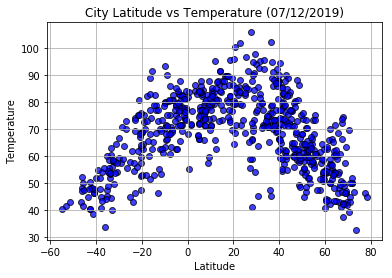

In [27]:
#Latitude vs Temperature Plot
plt.scatter(lat, temp, marker="o", facecolors = "blue", edgecolors="black", alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs Temperature " + "(07/12/2019)" )
plt.grid()

In [28]:
plt.savefig('LatvsTemp.png')

<Figure size 432x288 with 0 Axes>

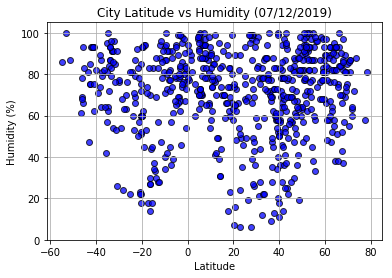

In [29]:
#Latitude vs Humidity Plot
plt.scatter(lat, humid, marker="o", facecolors = "blue", edgecolors="black", alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.title("City Latitude vs Humidity " + "(07/12/2019)" )
plt.grid()

In [30]:
plt.savefig('LatvsHumid.png')

<Figure size 432x288 with 0 Axes>

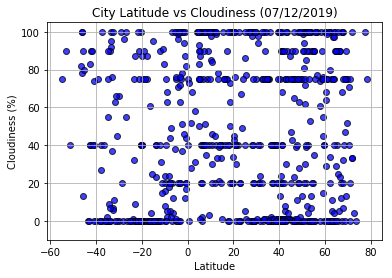

In [33]:
#Latitude vs Cloudines Plot
plt.scatter(lat, cloud, marker="o", facecolors = "blue", edgecolors="black", alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,105)
plt.title("City Latitude vs Cloudiness " + "(07/12/2019)" )
plt.grid()

In [34]:
plt.savefig('LatvsCloud.png')

<Figure size 432x288 with 0 Axes>

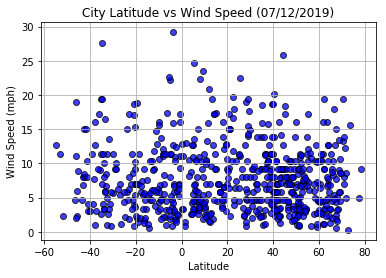

In [35]:
#Latitude vs Windspeed Plot
plt.scatter(lat, wind, marker="o", facecolors = "blue", edgecolors="black", alpha=.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(0,105)
plt.title("City Latitude vs Wind Speed " + "(07/12/2019)" )
plt.grid()

In [36]:
plt.savefig('LatvsWind.png')

<Figure size 432x288 with 0 Axes>